In [3]:
from PIL import Image
import os
import glob
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from scipy.misc import imshow
from scipy.misc import toimage
import time
from sklearn.metrics import accuracy_score
import random
from sklearn.utils import shuffle
import math


In [4]:
def load_dataset(path):
    print ('Loading Dataset...')
    train_set_x=[]
    train_set_y=[]
    test_set_x=[]
    test_set_y=[]
    for i in range(10):
        for filename in glob.glob(path+'\\train\\'+str(i)+'\\*.png'):
            im=plt.imread(filename)
            train_set_x.append(im)
            train_set_y.append(i)
            
    for i in range(10):
        for filename in glob.glob(path+'\\test\\'+str(i)+'\\*.png'):
            im=plt.imread(filename)
            test_set_x.append(im)
            test_set_y.append(i)
            
    print('Dataset Loaded.')
    return np.array(train_set_x),np.array(train_set_y),np.array(test_set_x),np.array(test_set_y)
    
    

In [7]:
train_set_x, train_set_y, test_set_x, test_set_y = load_dataset('.\\Task3_Data')

Loading Dataset...
Dataset Loaded.


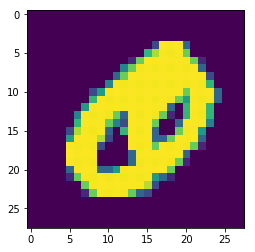

In [8]:
plt.imshow(train_set_x[0]) 
plt.show() 

In [9]:
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
train_set_y= train_set_y.reshape(60000,1)
test_set_y= test_set_y.reshape(10000,1)

In [11]:
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)

(60000, 28, 28)
(60000, 1)
(10000, 28, 28)
(10000, 1)


In [12]:
train_x_flatten=train_set_x.reshape(60000,784)
test_x_flatten=test_set_x.reshape(10000,784)

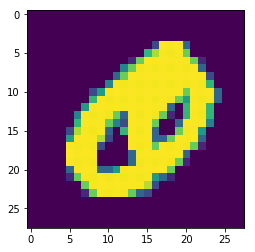

In [13]:
plt.imshow(train_x_flatten[0].reshape(28,28)) 
plt.show()

In [14]:
mean_train=train_x_flatten.mean(axis=1,keepdims=True)
mean_test=test_x_flatten.mean(axis=1,keepdims=True)

In [15]:
mean_train.shape

(60000, 1)

In [16]:
train_x_Mean_subtracted=train_x_flatten-mean_train
test_x_Mean_subtracted=test_x_flatten-mean_test

In [17]:
X=train_x_Mean_subtracted.reshape(60000,28,28)

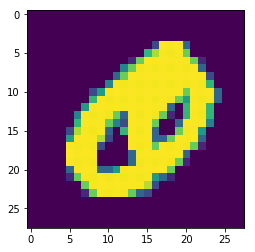

In [18]:
plt.imshow(X[0]) 
plt.show() 

In [19]:
train_x_Mean_subtracted_flatten=train_x_Mean_subtracted.copy()
test_x_Mean_subtracted_flatten=test_x_Mean_subtracted.copy()

In [20]:
train_x_Mean_subtracted_flatten, train_set_y = shuffle(train_x_Mean_subtracted_flatten, train_set_y)
#test_x_Mean_subtracted_flatten, test_set_y = shuffle(test_x_Mean_subtracted_flatten, test_set_y)

In [21]:
train_label_OHE=np.zeros([60000,10])
test_label_OHE=np.zeros([10000,10])
for i,each_training_label in enumerate(train_set_y):
    train_label_OHE[i][each_training_label]=1
    
for i,each_test_label in enumerate(test_set_y):
    test_label_OHE[i][each_test_label]=1


In [22]:
X=train_x_Mean_subtracted.reshape(60000,28,28)

In [23]:
train_label_OHE[500]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

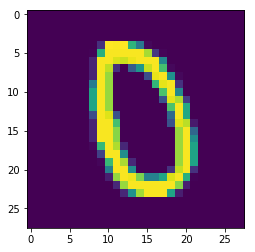

In [24]:
plt.imshow(X[500]) 
plt.show() 

In [25]:
# for i in range(0,60000):
#     train_label_OHE[i]=train_label_OHE[i].reshape((10,1))

In [26]:
def sigmoid(s):
    # activation function
    return 1/(1+np.exp(-s))

In [27]:
def sigmoid_derivative(s):
        #derivative of sigmoid
        return np.exp(-s)/((1+np.exp(-s))**2)

In [28]:

def lossCalculation_cross(Y_pred,Y_train):
    #print(Y_pred.shape)
    #print(Y_train.shape)
    cost = - ( np.sum( Y_train * np.log(Y_pred) ) )
    cost = np.squeeze(cost)    
    
    return cost
   
   

In [29]:
def softmax_numpy(scores):
    
    
    return np.exp(scores)/sum(np.exp(scores))

In [30]:
np.random.seed(1)
class Layer:
    def __init__(self, no_of_layer,no_of_neuron,input_dimensions,n,activation_func):
        self.no_of_layer=no_of_layer
        self.no_of_neuron=no_of_neuron
        self.A=np.zeros((no_of_neuron,n))
        self.Z=np.zeros((no_of_neuron,n))
        self.weight=np.random.rand(no_of_neuron, input_dimensions)/ np.sqrt(input_dimensions)
        self.bias=np.random.rand(no_of_neuron,1)
        self.dA=np.zeros((no_of_neuron,n))
        self.dZ=np.zeros((no_of_neuron,n))
        self.dB=np.zeros((no_of_neuron,1))
        self.dW=np.random.rand(no_of_neuron, input_dimensions)
        self.Activation_func=activation_func


In [31]:
def initialize_network():
    
    
    layer=Layer(1,neurons_per_layer[0],input_dim,1,activation_func=activation_func)
    layers.append(layer)
    for i in range(1,len(neurons_per_layer)):
        #print(i)
        layer=Layer(i,neurons_per_layer[i],layers[i-1].no_of_neuron,1,activation_func)
        #print(layer.weight)
        layers.append(layer)
        #print(each_layer)


In [32]:
def forward_prop(Image_index_,data):
    Image_index=Image_index_
    Image_=data[Image_index]
    Image_=Image_.reshape((784,1))
    weight_=layers[0].weight
    bias_=layers[0].bias
    Z=np.dot(weight_,Image_)+bias_
    layers[0].Z=Z
    A=sigmoid(Z)
    layers[0].A=A
    layers[0].dA=A*(1-A)
    for i,each_layer in enumerate(neurons_per_layer):
        if i > 0: 
            #print(i)
            weight_=layers[i].weight
            #print(weight_.shape)
            bias_=layers[i].bias            
            Z=np.dot(weight_,layers[i-1].A)+bias_
            layers[i].Z=Z
            #print(Z.shape)
            if i== len(neurons_per_layer)-1:
                A=softmax_numpy(Z)
                layers[i].A=A
            else:
                A=sigmoid(Z)
                layers[i].A=A
            if i != len(neurons_per_layer)-1:
                layers[i].dA=A*(1-A)

            #print(A.shape)

In [33]:
#forward_prop(0,test_x_Mean_subtracted_flatten)

In [34]:
def back_pro(Image_index_,lr_): 
    lr=lr_
    Image_index=Image_index_
    Image_=train_x_Mean_subtracted_flatten[Image_index].reshape((784,1))
    for j in range(1,len(neurons_per_layer)+1):
        i=len(neurons_per_layer)-j
        #print(i)
        if i==len(neurons_per_layer)-1:
            Y_train=train_label_OHE[Image_index].reshape(10,1)
            layers[i].dZ=layers[i].A-Y_train
            layers[i].dW=np.dot(layers[i].dZ,layers[i-1].A.T)
            layers[i].dB=np.sum(layers[i].dZ,axis=1,keepdims=True)
            #layers[i].weight=layers[i].weight - (lr * layers[i].dW)
        else:
            if i>0:
                layers[i].dZ=np.dot(layers[i+1].weight.T,layers[i+1].dZ)*layers[i].dA
                layers[i].dW=np.dot(layers[i].Z,layers[i-1].A.T)
                layers[i].dB=np.sum(layers[i].dZ,axis=1,keepdims=True)
                #layers[i].weight=layers[i].weight - (lr * layers[i].dW)
            else:
                layers[i].dZ=np.dot(layers[i+1].weight.T,layers[i+1].dZ)*layers[i].dA
                layers[i].dW=np.dot(layers[i].dZ,Image_.T)
                layers[i].dB=np.sum(layers[i].dZ,axis=1,keepdims=True)
#         print('dZ:\t ',i,'\t',layers[i].dZ)
#         print('dW:\t ',i,'\t',layers[i].dW)
#         print('dB:\t ',i,'\t',layers[i].dB)
                #layers[i].weight=layers[i].weight - (lr * layers[i].dW)
    
    for j in range(1,len(neurons_per_layer)+1):
        
        i=len(neurons_per_layer)-j
#         if np.isnan(np.min(layers[0].weight)):
#             print(Image_index_)
        layers[i].weight=layers[i].weight - (lr * layers[i].dW)
        layers[i].bias=layers[i].bias - (lr * layers[i].dB)
        #print(layers[i].weight.shape)
        
        

In [35]:
def Calculate_accuracy():

    classified_list=list()
    for i in range(len(test_x_Mean_subtracted_flatten)):
        test_image_index=i

        forward_prop(test_image_index,test_x_Mean_subtracted_flatten)
        Y_predict=layers[len(neurons_per_layer)-1].A
        Y_hat=test_label_OHE[test_image_index].reshape((10,1))
        is_Correctly_Classified =False
        if Y_predict.argmax()==Y_hat.argmax():
            is_Correctly_Classified=True
        #print(Y_predict,'\t',Y_hat,'\t',is_Correctly_Classified,' ', i)
        classified_list.append(is_Correctly_Classified)
        
    True_count=classified_list.count(True)
    False_count =classified_list.count(False)
    total=len(classified_list)
    accuracy=True_count/total*100
    return accuracy

In [36]:
# layers[0].weight

Epoch:  0
Mean_loss:  0.5714853842271198
Accuracy:  91.19
Epoch:  1
Mean_loss:  0.3024718848596245
Accuracy:  92.04
Epoch:  2
Mean_loss:  0.27422663055920715
Accuracy:  92.36999999999999
Epoch:  3
Mean_loss:  0.2579810704295873
Accuracy:  92.55
Epoch:  4
Mean_loss:  0.24706646469617805
Accuracy:  92.67
Epoch:  5
Mean_loss:  0.23901272936068838
Accuracy:  92.83
Epoch:  6
Mean_loss:  0.2325615054673689
Accuracy:  93.0
Epoch:  7
Mean_loss:  0.22724302152536108
Accuracy:  93.07
Epoch:  8
Mean_loss:  0.222782031328843
Accuracy:  93.06
Epoch:  9
Mean_loss:  0.21896678629104643
Accuracy:  93.19


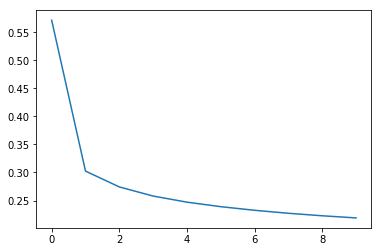

In [37]:
no_of_layers=2
input_dim=784
neurons_per_layer=[10,10]
layers=[]
activation_func='sigmoid'
initialize_network()
mean_loss_list=list()
epochs=10
for epoch_num in range(epochs):
    loss_list=list()
    for i in range(0,60000):
        forward_prop(i,train_x_Mean_subtracted_flatten)
        loss_list.append(lossCalculation_cross(layers[len(neurons_per_layer)-1].A,train_label_OHE[i].reshape((10,1))))
        back_pro(i,0.01)
    print('Epoch: ',epoch_num)
    print('Mean_loss: ',np.mean(loss_list))
    mean_loss_list.append(np.mean(loss_list))
    acc=Calculate_accuracy()
    print('Accuracy: ',acc)
plt.plot(mean_loss_list)
plt.show()